In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
stoc = yf.Ticker("SHIB-INR")
# hist = stoc.history(period="24hrs")
#get last 24hrs data
hist = stoc.history(period="24hrs",interval="5m")
df = pd.DataFrame(hist,columns=['Open','High','Low','Close','Volume'])
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-04-09 00:00:00+00:00,0.000889,0.000890,0.000889,0.000890,12718080
2023-04-09 00:05:00+00:00,0.000891,0.000892,0.000891,0.000892,11048960
2023-04-09 00:10:00+00:00,0.000892,0.000894,0.000892,0.000894,26077184
2023-04-09 00:15:00+00:00,0.000894,0.000894,0.000894,0.000894,19481600
2023-04-09 00:20:00+00:00,0.000894,0.000894,0.000894,0.000894,16003072
...,...,...,...,...,...
2023-04-09 04:40:00+00:00,0.000892,0.000892,0.000892,0.000892,4896768
2023-04-09 04:45:00+00:00,0.000892,0.000892,0.000892,0.000892,4487168
2023-04-09 04:50:00+00:00,0.000892,0.000892,0.000892,0.000892,2210816


In [62]:
from sklearn.model_selection import train_test_split
X = df[['Open','High','Low','Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
# pd.DataFrame(X_test)
pd.DataFrame(y_test)

,Close
Datetime,
2023-04-09 02:10:00+00:00,0.000895
2023-04-09 02:55:00+00:00,0.000894
2023-04-09 05:00:00+00:00,0.000892
2023-04-09 02:20:00+00:00,0.000895
2023-04-09 00:55:00+00:00,0.000895
2023-04-09 00:10:00+00:00,0.000894
2023-04-09 02:50:00+00:00,0.000895
2023-04-09 04:55:00+00:00,0.000892
2023-04-09 03:20:00+00:00,0.000892


In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [64]:
lr.fit(X_train,y_train)

LinearRegression()

In [65]:
c = lr.coef_
m = lr.intercept_
c,m

(array([-8.54008999e-01,  8.76920550e-01,  9.80401842e-01,  1.85235786e-15]),
 -2.9399202145835492e-06)

In [66]:
y_pred = lr.predict(X_test)
y.head(),y_pred[:5]

(Datetime
 2023-04-09 00:00:00+00:00    0.000890
 2023-04-09 00:05:00+00:00    0.000892
 2023-04-09 00:10:00+00:00    0.000894
 2023-04-09 00:15:00+00:00    0.000894
 2023-04-09 00:20:00+00:00    0.000894
 Name: Close, dtype: float64,
 array([0.00089487, 0.00089442, 0.00089215, 0.0008946 , 0.00089501]))

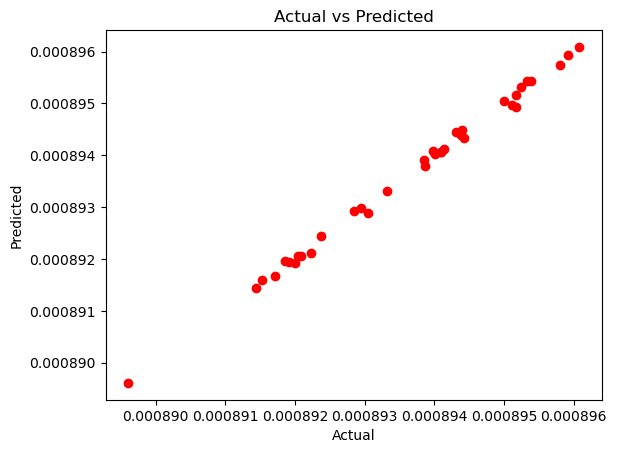

In [67]:
plt.scatter(y_train,lr.predict(X_train),color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

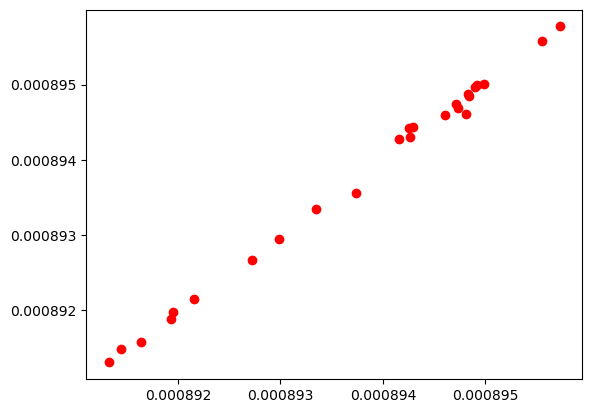

In [69]:
plt.scatter(y_test,lr.predict(X_test),color='red')
#once revisit this after u learn implementing this from scratch in w2 work as im not sure if this is correct